In [7]:
import kagglehub
abhijeetgo_indian_pines_hyperspectral_dataset_path = kagglehub.dataset_download('abhijeetgo/indian-pines-hyperspectral-dataset')

print('Data source import complete.')

100%|██████████| 5.54M/5.54M [00:00<00:00, 7.65MB/s]

Extracting files...
Data source import complete.


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
pip install spectral


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 7.7 MB/s eta 0:00:00


In [10]:
pip install plotly


In [11]:
import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score



import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import spectral

%matplotlib inline

import numpy as np
from scipy.io import loadmat

In [12]:
import numpy as np
from scipy.io import loadmat

# Load the hyperspectral dataset IP
hyperspectral_data_path_IN = "/content/indianpinearray.npy"
hyperspectral_data_IN = np.load(hyperspectral_data_path_IN, allow_pickle=True)

# Load the ground truth data IP
ground_truth_path_IN = "/content/IPgt.npy"
ground_truth_data_IN = np.load(ground_truth_path_IN, allow_pickle=True)

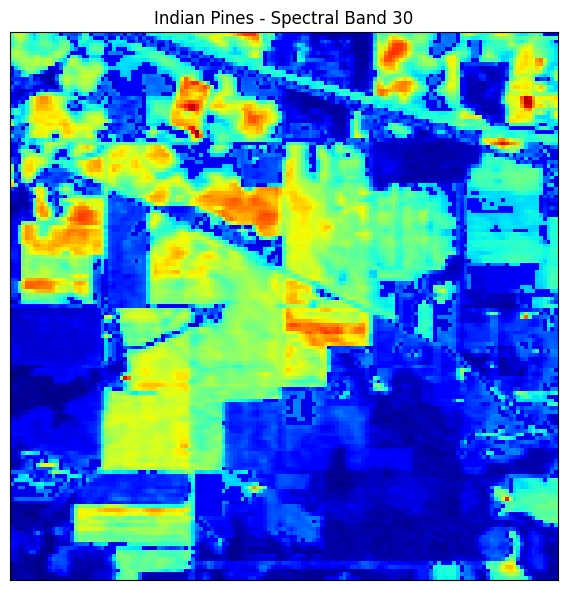

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def load_hyperspectral_data(dataset):
    pass

def plot_spectral_band(hyperspectral_data, dataset, spectral_band, ax):
    band_data = hyperspectral_data[:, :, spectral_band]

    ax.imshow(band_data, cmap='jet')
    ax.set_title(f"{dataset} - Spectral Band {spectral_band}")
    ax.set_xticks([])
    ax.set_yticks([])

# Loaded data
hyperspectral_data = {
    "IP": hyperspectral_data_IN,
}

# Select a spectral band to visualize
spectral_band = 30

# Create subplots to visualize the Indian Pines dataset
fig, ax = plt.subplots(figsize=(8, 6))
plot_spectral_band(hyperspectral_data["IP"], "Indian Pines", spectral_band, ax)

plt.tight_layout()
plt.show()

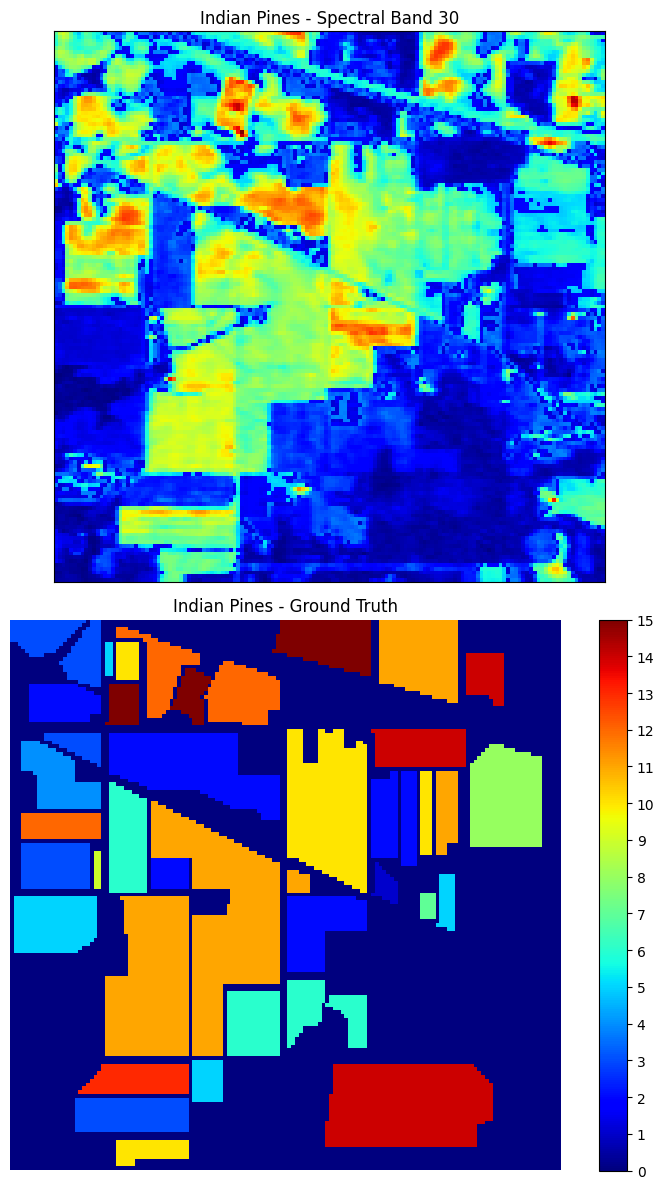

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy.io import loadmat

def load_hyperspectral_data(dataset):
    # Your implementation to load data goes here (same as before)
    pass

def plot_spectral_band(hyperspectral_data, dataset, spectral_band, ax):
    band_data = hyperspectral_data[:, :, spectral_band]

    ax.imshow(band_data, cmap='jet')
    ax.set_title(f"{dataset} - Spectral Band {spectral_band}")
    ax.set_xticks([])
    ax.set_yticks([])

def plot_ground_truth(ground_truth_data, dataset, ax):
    im = ax.imshow(ground_truth_data, cmap='jet', vmin=0, vmax=15)
    ax.set_title(f"{dataset} - Ground Truth")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    cbar = plt.colorbar(im, ax=ax, ticks=range(16))

# Loaded data
hyperspectral_data = {
    "IP": hyperspectral_data_IN,
}

ground_truth_data = {
    "IP": ground_truth_data_IN,
}

# Select a spectral band to visualize
spectral_band = 30

# Create subplots to visualize the "Indian Pines" dataset
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
plot_spectral_band(hyperspectral_data["IP"], "Indian Pines", spectral_band, axes[0])
plot_ground_truth(ground_truth_data["IP"], "Indian Pines", axes[1])

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
from scipy.io import loadmat

def load_hyperspectral_data(dataset):
    pass

# Loaded data
ground_truth_data = {
    "IP": ground_truth_data_IN,
}

# Get unique classes and their counts for the "Indian Pines" dataset
dataset = "IP"
unique_classes, class_counts = np.unique(ground_truth_data[dataset], return_counts=True)

num_classes = len(unique_classes)

print(f"\nDataset: {dataset}")
print(f"Number of classes: {num_classes}")
print("Class labels and their counts:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {int(cls)}: {count} pixels")



Dataset: IP
Number of classes: 17
Class labels and their counts:
Class 0: 10776 pixels
Class 1: 46 pixels
Class 2: 1428 pixels
Class 3: 830 pixels
Class 4: 237 pixels
Class 5: 483 pixels
Class 6: 730 pixels
Class 7: 28 pixels
Class 8: 478 pixels
Class 9: 20 pixels
Class 10: 972 pixels
Class 11: 2455 pixels
Class 12: 593 pixels
Class 13: 205 pixels
Class 14: 1265 pixels
Class 15: 386 pixels
Class 16: 93 pixels


In [16]:
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA

# Define a function to apply PCA on the hyperspectral data
def apply_pca(hyperspectral_data, n_components):
    # Flatten the hyperspectral data to 2D (samples, features)
    num_samples, num_features, num_bands = hyperspectral_data.shape
    flattened_data = hyperspectral_data.reshape((num_samples * num_features, num_bands))

    # Apply PCA
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(flattened_data)

    # Reshape the reduced data back to 3D (samples, rows, columns)
    reduced_data = reduced_data.reshape((num_samples, num_features, n_components))

    return reduced_data

# Number of components to keep after PCA
num_components = 30

# Apply PCA for the "Indian Pines" dataset
reduced_data_IP = apply_pca(hyperspectral_data_IN, num_components)

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Flatten the hyperspectral data to 2D (samples, features)
num_samples, num_features, num_bands = hyperspectral_data_IN.shape
flattened_data = hyperspectral_data_IN.reshape((num_samples * num_features, num_bands))

# Flatten the ground truth data to 1D
ground_truth_labels = ground_truth_data_IN.ravel()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flattened_data, ground_truth_labels, test_size=0.2, random_state=42)


# Create a k-NN classifier with k=3 (you can change the value of k as desired)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of k-NN model: {accuracy:.2f}")

Accuracy of k-NN model: 0.72


Test Accuracy: 0.8009756097560976
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.73      0.72      0.72       286
           2       0.85      0.58      0.69       166
           3       0.71      0.32      0.44        47
           4       0.91      0.84      0.87        97
           5       0.87      1.00      0.93       146
           6       1.00      1.00      1.00         5
           7       0.90      0.98      0.94        96
           8       1.00      0.50      0.67         4
           9       0.80      0.81      0.80       194
          10       0.72      0.88      0.79       491
          11       0.74      0.56      0.64       119
          12       0.89      0.98      0.93        41
          13       0.91      0.97      0.94       253
          14       0.81      0.51      0.62        77
          15       0.94      0.84      0.89        19

    accuracy          

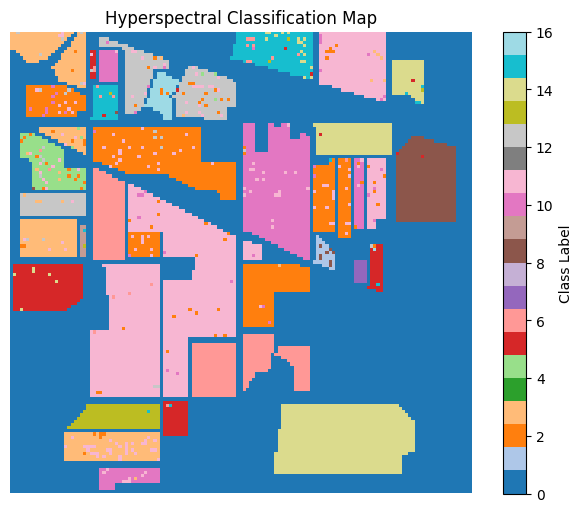

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Flatten and mask
X = hyperspectral_data_IN.reshape(-1, hyperspectral_data_IN.shape[-1])
y = ground_truth_data_IN.reshape(-1)
mask = y > 0
X = X[mask]
y = y[mask] - 1  # Make labels 0-based

# Step 2: Normalize and reduce dimensions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=30, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train model
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Full-image classification (only valid pixels)
H, W, C = hyperspectral_data_IN.shape
X_full = hyperspectral_data_IN.reshape(-1, C)
full_mask = ground_truth_data_IN.flatten() > 0

X_masked = X_full[full_mask]
X_masked_scaled = scaler.transform(X_masked)
X_masked_pca = pca.transform(X_masked_scaled)

y_full_pred = clf.predict(X_masked_pca)

# Create full classification map
classification_map = np.zeros_like(ground_truth_data_IN.flatten())
classification_map[full_mask] = y_full_pred + 1  # Restore original label range

classification_map_2d = classification_map.reshape(H, W)

# Step 7: Show image
plt.figure(figsize=(8, 6))
plt.imshow(classification_map_2d, cmap='tab20')
plt.title("Hyperspectral Classification Map")
plt.axis('off')
plt.colorbar(label="Class Label")
plt.show()
